In [1]:
import pandas as pd
# check of column names if they are the same in all the sheets so checking the first and last sheet
my_file = pd.ExcelFile('Coronavirus dataT.xlsx')
df_30_4 =pd.read_excel(my_file,sheet_name = '30-4')
df_14_6 =pd.read_excel(my_file,sheet_name = '14-6')

#check if the columns are the same in both df's 
# cols A:L as the same the last column is different
df_30_4.columns==df_14_6.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False])

In [2]:
#get all the sheets from 30-4 to the end 14-6 as a list of df's
index_of_30_4 = my_file.sheet_names.index('30-4')
# get the slice of the list of the sheers starting at the index of the sheet '30-4' and go to the end
sheets = my_file.sheet_names[index_of_30_4:]
print('Number of sheets: ',len(sheets))

Number of sheets:  46


In [11]:
# read multiple sheets from my_file -> this will return a dictionary
df_dictionary = pd.read_excel(my_file,sheets,usecols = 'A:L',skipfooter=1)
print(type(df_dictionary))

# using list comprehension use name of the sheet - which is a date to add the extra column to all sheets
# with that date 
df_dictionary=[df_dictionary[sheet].assign(Date=pd.to_datetime(sheet+'2020',format = '%d-%m%Y')) for sheet in sheets]

type(df_dictionary)


<class 'dict'>


list

In [4]:
merged_dfs = pd.concat(df_dictionary,ignore_index=True)

In [5]:
# data from ireland for the dates 30-4 to the end 14-6 
#.iloc[:,:13]- this was needed before when we had too many columns

ire=merged_dfs[merged_dfs['Country']=='Ireland']
swe=merged_dfs[merged_dfs['Country']=='Sweden']

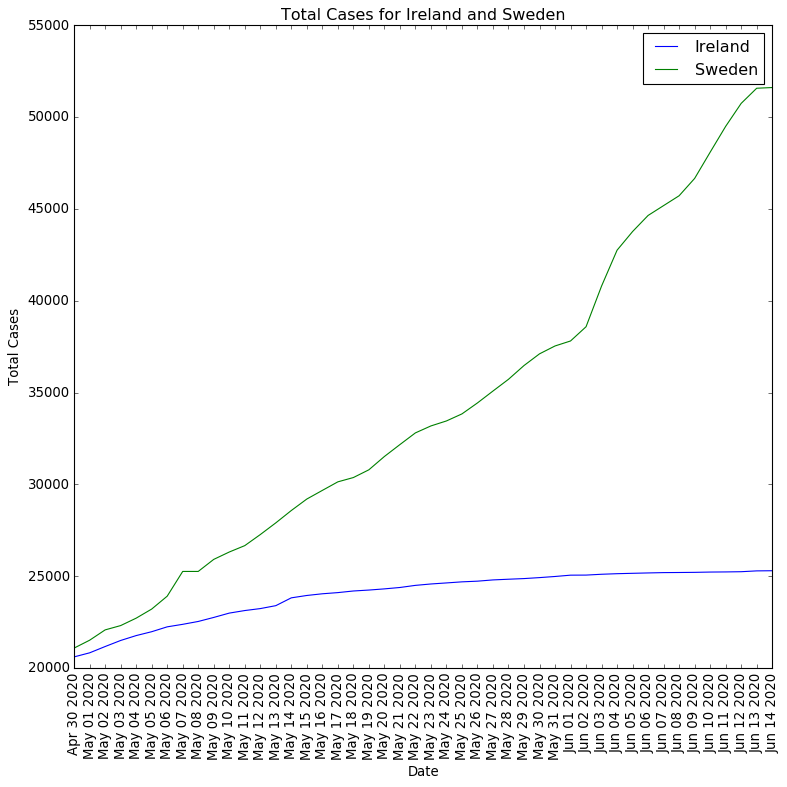

In [6]:
#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')

plt.style.use('classic')

plt.figure(figsize=(10,10),facecolor='white')

plt.plot(ire['Date'],ire['Total Cases'],label = 'Ireland')
plt.plot(swe['Date'],swe['Total Cases'],label = 'Sweden')

plt.title('Total Cases for Ireland and Sweden')
plt.xlabel('Date')
plt.ylabel('Total Cases')


plt.xticks(ticks= ire['Date'],rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# write the merged dfs to excel file called data_30_4_to_14_06

with pd.ExcelWriter('data_30_4_to_14_06.xlsx') as writer:
    merged_dfs.to_excel(writer)

In [8]:
df_30_4_to_14_06 = pd.read_excel('data_30_4_to_14_06.xlsx',index_col=0)
df_30_4_to_14_06.head()


,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/ 1M pop,Total Deaths/ 1M pop,Total Tests,Tests/1M pop,Date
0,USA,1095023,30829.0,63856.0,2201.0,152324.0,878843.0,15226.0,3308.0,193.0,6391887.0,19311.0,2020-04-30
1,Spain,239639,2740.0,24543.0,268.0,137984.0,77112.0,2676.0,5125.0,525.0,1455306.0,31126.0,2020-04-30
2,Italy,205463,1872.0,27967.0,285.0,75945.0,101551.0,1694.0,3398.0,463.0,1979217.0,32735.0,2020-04-30
3,UK,171253,6032.0,26771.0,674.0,NaN,144138.0,1559.0,2523.0,394.0,901905.0,13286.0,2020-04-30
4,France,167178,758.0,24376.0,289.0,49476.0,93326.0,4019.0,2561.0,373.0,724574.0,11101.0,2020-04-30
